<a href="https://colab.research.google.com/github/sukwonc/first-repo/blob/master/ReadingGdrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


/content


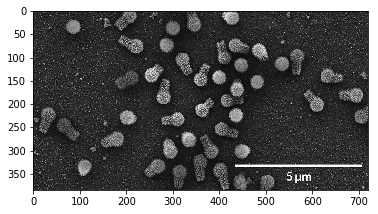

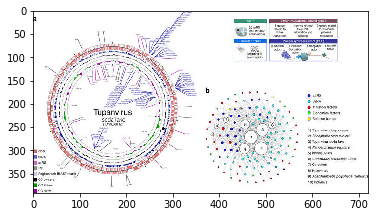

328


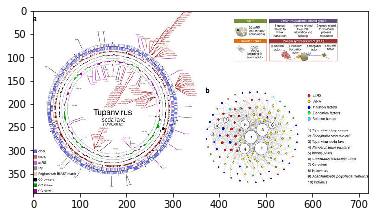

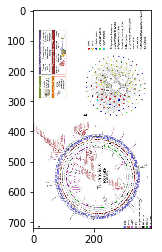

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

cwd=os.getcwd()
print(cwd)
os.listdir('/content/gdrive/My Drive/Colab Notebooks/')

a=cv2.imread('/content/gdrive/My Drive/Colab Notebooks/image/IMG_0007.JPG')
b=cv2.imread('./gdrive/My Drive/Colab Notebooks/image/IMG_0008.JPG')

plt.imshow(a)
plt.show()

plt.imshow(b)
plt.show()

c = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

height, width, channel = c.shape
height_T = width
width_T = height
delta=width-height
print(delta)
M = cv2.getRotationMatrix2D((width/2, height/2+delta/2), 90, 1)
c_T = cv2.warpAffine(c, M, (width_T, height_T))

delta_T=width_T-height_T
M_1 = cv2.getRotationMatrix2D((width_T/2, height_T/2+delta_T/2),90,1)
c_T2 = cv2.warpAffine(c_T, M_1, (width, height))

plt.imshow(c)
plt.show()

plt.imshow(c_T)
plt.show()

In [0]:
def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows, cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    img_rot = cv2.warpAffine(img, M, (cols, rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0)
    box = cv2.boxPoints(rect)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1],
               pts[1][0]:pts[2][0]]
    return img_crop 


print('does it work?')

In [0]:
a